# PRML Chapter 1

In [376]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Polynomial Curve fitting
Note there are a few types of linear models.



Linear regression
1. simple linear regression - 1D dependent variable, 1D independent variable
    - model assumptions include Y is normally distributed and so is it's error
2. multiple linear regression - 1D dependent variable, nD indepdnent variable

General Linear model
3. multivariate linear regression - nD dependent variable, nD independent variable


IMPORTANT: to Linear least squares regression, there is a normal equation closed-form solution.
- each function to minimize is CONVEX

Non-linear regression
4. cannot be described as linear model of coefficients

IMPORTANT: There is usually no closed-form solution, and this requires iterative methods.

Generalized Linear Model
5. error response not only gaussian
https://en.wikipedia.org/wiki/Generalized_linear_model
    - link function LINKS themean of distribution and linear predictor. 
    Gaussian mean = $XB$
    
    
    
What about binomial mean and link? e.g logistic regression uses logistic function over linear model. You use linear model and then what transformation after tha?
    
Binomial
Logit regression

    
    
What is the point of a link function? https://stats.stackexchange.com/questions/48594/purpose-of-the-link-function-in-generalized-linear-model
- The linear model shouldn't extrapolate PAST the direction of what's needed (e.g binary problem)
Polynomial regression 
6. Still a linear model in terms of its parameters, but it's a non-linear model in terms of the data. Special case of multiple linear regression. Can be nD independent variable.
    - other way is wavelets, splines, radial basis, etc

# Exercise 1.1
### Show that the coefficients that minimize $$E(w) = \frac{1}{2}\sum_{n=1}^{N}\{ {{y(x_{n}, w) - t_{n}}\}  ^{2}} $$ are given by the solution to the set of linear equations $$\sum_{j=0}^{M} {A_{ij}w_{j} = T_{i}}$$ where $A_{ij} = \sum_{n=1}^{N}(x_{n})^{i+j}$, $T_{i} = \sum_{n=1}^{N}(x_{n})^{i}t_{n}$ and $y(x_{n}, w) = \sum_{j=0}^{M} x_{n}^{j}w_{j}$

## Solution 1.1 
For each ${\bf{w}} = [w_{1}, w_{2}, .. w_{i}]$ we can take the partial derivative and set it to 0. Note that we do this individually for each sub $w$.

$$\frac{\partial{E_{w}}}{\partial{w_{i}}} = \sum_{j=0}^{M}(x_{n}^{i})( x_{n}^{j}w_{j} - t_{n}) = 0$$

$$=\sum_{n=1}^{N} (x_{n}^{i})\sum_{j=0}^{M}( x_{n}^{j}w_{j}) - t_{n}$$

$$=\sum_{n=1}^{N} (\sum_{j=0}^{M}(x_{n}^{i + j}w_{j})) - t_{n}x_{n}^{i}$$

$$=\sum_{n=1}^{N} (\sum_{j=0}^{M}(x_{n}^{i + j}w_{j})) = t_{n}x_{n}^{i}$$

And we swap the place of the sums:

$$= \sum_{j=0}^{M} \sum_{n=1}^{N} (x_{n}^{i + j}w_{j} - t_{n}x_{n}^{i})$$
$$=\sum_{j=0}^{M} {A_{ij}w_{j} = T_{i}}$$


## Solution 1.2
We do almost the exact same thing.
$$=\sum_{n=1}^{N} (\sum_{j=0}^{M}(x_{n}^{i + j}w_{j})) + \lambda w_{i} = t_{n}x_{n}^{i}$$
$$=\sum_{n=1}^{N} (\sum_{j=0}^{M}((x_{n}^{i + j} + I_{ij}\lambda) w_{j})) = t_{n}x_{n}^{i}$$
where $I_{ij} = \begin{array}{ll}
      1 & i = j \\
      0 & i \neq j
\end{array} $

In [359]:
# generate points for sin(2*pi*x)
# needs to be random space
data_points = 100
x_samples = np.random.random(data_points)


Why do we use gaussian noise?
1. mathematically convenient
2. central limit theorem states lots of factors and enough samples will converge to gaussian noise. Makes sense

In [372]:
def sine(x, dp):
    eps = 0.0001
    noise = eps*(np.random.normal(dp))
    return np.sin(2*np.pi*x) + noise

sin_x = sine(x_samples, data_points) #add gaussian nosie 

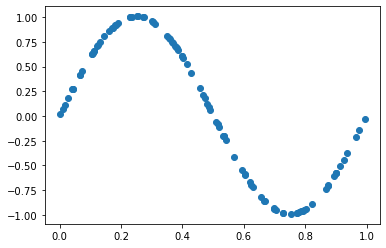

In [373]:
plt.scatter(x_samples, sin_x)

In [374]:
def polynomial_regression(parameters, x):
    return sum([(x**i)*parameters[i] for i, j in enumerate(parameters)])

def polynomial_loss(parameters):
    order = len(parameters)
    #x = x_samples[0]
    #y = sin_x[0]
    y_pred = [polynomial_regression(parameters, x) for x in x_samples]
    L = (1/2)*sum((y_pred-sin_x)**2)
    return L

def polynomial_reg_L2_loss(parameters):
    lamb = 0.1
    order = len(parameters)
    y_pred = [polynomial_regression(parameters, x) for x in x_samples]
    L = (1/2)*sum((y_pred-sin_x)**2) + (lamb/2)*np.linalg.norm(parameters)
    return L

def polynomial_reg_L0_loss(parameters):
    lamb = 100.0
    order = len(parameters)
    y_pred = [polynomial_regression(parameters, x) for x in x_samples]
    L = (1/2)*sum((y_pred-sin_x)**2) + (lamb/2)*len(parameters)
    return L

def polynomial_reg_L1_loss(parameters):
    lamb = 0.01
    order = len(parameters)
    y_pred = [polynomial_regression(parameters, x) for x in x_samples]
    L = (1/2)*sum((y_pred-sin_x)**2) + (lamb/2)*np.linalg.norm(parameters, ord=1)
    return L

params = [1,]*9
test = minimize(polynomial_reg_L2_loss, params)
test['x']

array([  0.0515523 ,   7.35705457, -14.59837323,  -4.89349801,
         4.57054642,   7.63045816,   5.53674637,   0.45617022,
        -5.96975134])

error 11.350740863853899 0.011350740863853898


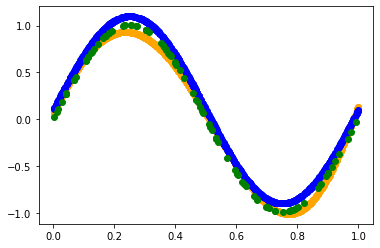

In [375]:

new_samples = np.random.random(data_points*10)
plt.scatter(new_samples, [polynomial_regression(test['x'], x) for x in new_samples], color='orange')
plt.scatter(new_samples, sine(new_samples, len(new_samples)), color='blue')
plt.scatter(x_samples, sin_x, color='green')

test_error = sum(([polynomial_regression(test['x'], x) for x in new_samples] - sine(new_samples, len(new_samples)))**2) 
print("error", test_error, test_error/len(new_samples))
      

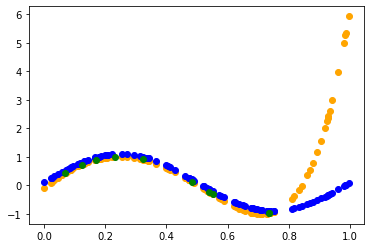

In [191]:
# watch how it overfits!
new_samples = np.random.random(data_points*10)
plt.scatter(new_samples, [polynomial_regression(test['x'], x) for x in new_samples], color='orange')
plt.scatter(new_samples, sine(new_samples, len(new_samples)), color='blue')
plt.scatter(x_samples, sin_x, color='green')

Bishop9 notes that data should be a 5-10 multiple of the number of parameters.

Later on, bayesian approaches don't overfit and show us that it adapts to the size of the dataset.

## Interesting tangents

https://en.wikipedia.org/wiki/Robust_regression

https://en.wikipedia.org/wiki/Robust_statistics

More on L1 L2
https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

In [395]:
from scipy import stats

(array([  22.,  170.,  677., 1739., 2719., 2615., 1450.,  482.,  105.,
          21.]),
 array([1.49066619, 2.21100567, 2.93134516, 3.65168464, 4.37202413,
        5.09236361, 5.81270309, 6.53304258, 7.25338206, 7.97372155,
        8.69406103]),
 <a list of 10 Patch objects>)

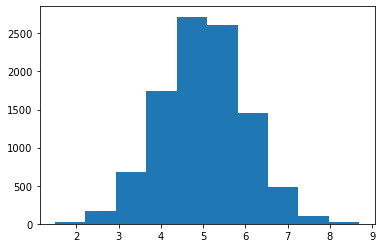

In [471]:
# random p_y(y)
y = np.random.normal(5, 1, (10000)) 
plt.hist(y)

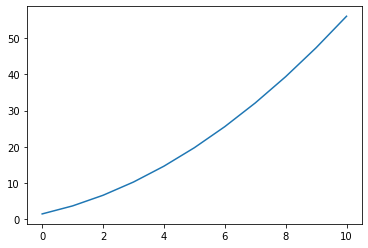

In [473]:
bin_edges, hist = np.histogram(y)
plt.plot(np.cumsum(hist))

In [435]:
y_sorted

array([1.26997652, 1.36199497, 1.53189017, ..., 8.21263203, 8.34009858,
       9.0587047 ])

In [405]:
print(stats.mode(y))

ModeResult(mode=array([1.12374161]), count=array([1]))


(array([9.727e+03, 1.900e+02, 4.300e+01, 1.700e+01, 1.100e+01, 5.000e+00,
        4.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([5.41756343e+01, 2.46732826e+08, 4.93465597e+08, 7.40198369e+08,
        9.86931140e+08, 1.23366391e+09, 1.48039668e+09, 1.72712945e+09,
        1.97386223e+09, 2.22059500e+09, 2.46732777e+09]),
 <a list of 10 Patch objects>)

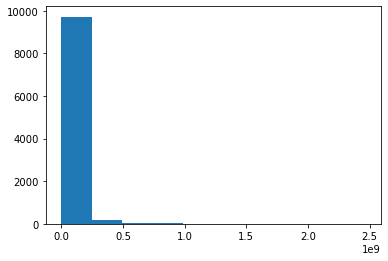

In [486]:
# y = x**2
#x = np.cbrt(y)
x = y**10
plt.hist(x)

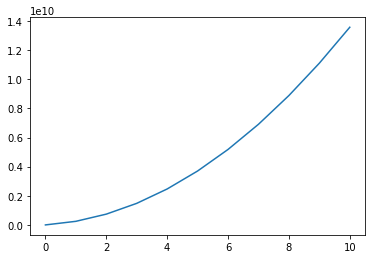

In [490]:
bin_edges, hist = np.histogram(x)
plt.plot(np.cumsum(hist))

## Probability theory

Probability densities are defined as the chance of a random variable $X$ falling within an interval $(x, x+\delta x)$ as $p(x)\delta x$. 

This stems from the idea of a cumulative distribution function of all the events contained in a probability space. By dividing up a probability density into pieces of $\delta x$, we can get the probability of that part over the whole space.

Its important that distributions have the properties of being greater than or equal to zero and normalizing to a total probability of 1.

How does this relate to cumulative density functions? The normalization is that the cdf equals one.


Talking about the change of variable formula, we choose a certain random variable to represent our distribution. However, we may transform that variable, and the formula has the jacobian factor, because what previously was $dy$ becomes $|\frac{dy}{dx}|dx$. This has to do with conservation of area/mass in our probability densities.

## Solution 1.4
We want to show that due to a jacobian factor in the change of variable formula $p_{y}(y)=p_{x}(x)|\frac{dy}{dx}|$, the maximum extrema does not simply follow the relation $x = g(y)$.

If we think about a function $f(g(y))$ and take its derivative, we get $f'(g(y))g'(y) = 0$ and so for some $\hat{y}$ we have the maximum. 

We know $f'(g(y)) = 0$ because $f'(x) = 0$. So a function of this form would follow the relation $\hat{x} = g(\hat{y})$.

However, differentiating out the change of variable formula of $p_{y}(y) = p_{x}(g(y))g'(y)$ gives
$p_{x}(g(y))g''(y) + p'_{x}(g(y))g'(y)^{2}$, and we find that on the right hand side, we have $p'_{x}(g(y))g'(y)* g'(y)$ where we previously established equals zero. However, the left side of the equation does not necessarily equal zero, except when our change of variable is a linear function that becomes zero in the second derivative.

### Demo: 


(array([  5.,  11.,  53., 120., 217., 259., 179., 123.,  26.,   7.]),
 array([-3.40242327, -2.76918908, -2.13595489, -1.5027207 , -0.86948651,
        -0.23625232,  0.39698187,  1.03021606,  1.66345025,  2.29668444,
         2.92991863]),
 <a list of 10 Patch objects>)

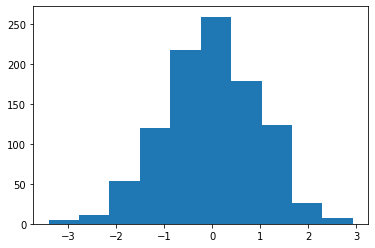

In [500]:
x = np.random.normal(0, 1, (1000))

plt.hist(x)

(array([  5.,  11.,  53., 120., 217., 259., 179., 123.,  26.,   7.]),
 array([3.29878836, 3.61540546, 3.93202255, 4.24863965, 4.56525674,
        4.88187384, 5.19849093, 5.51510803, 5.83172513, 6.14834222,
        6.46495932]),
 <a list of 10 Patch objects>)

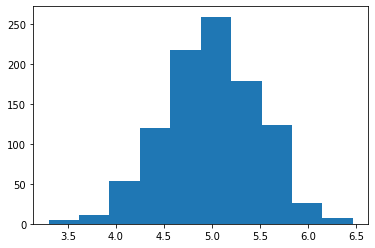

In [501]:
y = 0.5*x + 5
plt.hist(y)

/home/kchow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


(array([  4.,   5.,   4.,  15.,  26.,  51.,  83., 121., 161.,  51.]),
 array([-3.94736647, -3.28418856, -2.62101066, -1.95783276, -1.29465485,
        -0.63147695,  0.03170095,  0.69487886,  1.35805676,  2.02123466,
         2.68441256]),
 <a list of 10 Patch objects>)

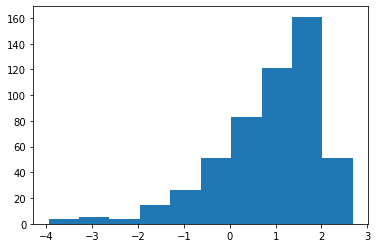

In [511]:
y = np.log(5*x)
plt.hist(y)

## Solution 1.5
We want to show that $var[f] = E[f(x) - E[f(x)])^2] = E[f(x)^2] - E[f(x)]^2$

$E[(f(x) - E[f(x)])^2] = (f(x)^2 - 2f(x)E[f(x)] + E[f(x)]^2)$


$E[f(x)^2] - 2E[f(x)]E[f(x)] + E[f(x)]^2) = E[f(x)^2] - E[f(x)]^2$

## Solution 1.6
We want to show that if $x$ and $y$ are independent, then $cov[x, y] = 0$

$P(x, y) = P(x)P(y)$

$cov[x, y] = E_{x, y}[(x-E[x])(y-E[y])] = E_{x, y}[xy] - E[x]E[y]$

The middle part equals the right because $$E_{x,y}[(xy - xE[y] - yE[x] + E[x]E[y])] = E_{x,y}[xy] - E_{x,y}[x]E[y] - E_{x,y}[y]E[x] + E[x]E[y])]$$

$E_{x}[f(x, y)]$ means averaged over x (result is a function of y), however taking $E_{x,y}E[x]$ or $E_{x,y}E[y]$ (expectation of expectation just gives you $E[x]$ $E[y]$. Why is that?

$E_{x,y}[(xy - xE_{x}[f(x, y)] - yE_{y}[f(x, y)] + E[x]E[y])]$

If $x$, $y$ are independent, $P(x, y) = P(x)P(y)$. For $cov[x, y]$ to be zero, $E_{x,y}[xy] = E[x]E[y]$

$E_{x,y}[xy] = \int\int_{}^{}{xy p(x, y)} dy dx = \int\int_{}^{}{xy p(x)p(y)} dy dx$ 

$E[x]E[y] = (\int xp(x)dx)(\int yp(y) dy) = \int\int_{}^{}{xy p(x)p(y)} dy dx$

## Solution 1.7
We want to show that the gaussian is normalized.


$\int_{-\infty}^{\infty} N(x|\mu, \sigma^2) dx = 1$

$N(x|\mu, \sigma^2) = \frac{1}{2\pi\sigma^2}exp(-\frac{1}{2\sigma^2}(x-\mu)^2)$

We should take the integral of 

Then we would move from cartesian to polar coordinates for easier integration

change of variable